# Step 1: Importing Essential Libraries
The code begins by importing essential libraries, including pandas for data manipulation, numpy for numerical operations, and seaborn and matplotlib for data visualization. These libraries will be used throughout the code for data analysis and model building.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sklearn

In [ ]:
import math

In [ ]:
!python --version

Python 3.10.12


In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)
print("math version:", math.__version__)


Pandas version: 1.5.3
NumPy version: 1.23.5
Seaborn version: 0.12.2
sklearn version: 1.2.2


AttributeError: ignored

# Step 2: Loading and Inspecting Data
The data is read from a CSV file named 'housing.csv' and stored in a Pandas DataFrame called 'data'.

In [ ]:
df = pd.read_csv('budapestelado_thesis.csv')

In [ ]:
df

,City,Street,Street type,District,Price(HUF),Area(m²),Balcony(m²),Rooms,Address,lat,long
0,budapest,Kalapács,utca,XIV,68900000,75,NaN,3 + 1 half room,"budapest,Kalapács utca, XIV",47.510050,19.125259
1,budapest,Fehérvári,út,XI,68990000,56,4.00,2 room,"budapest,Fehérvári út, XI",47.457638,19.040389
2,budapest,Pünkösdfürdő,utca,III,60200000,44,4.18,2 room,"budapest,Pünkösdfürdő utca, III",47.594825,19.060386
3,budapest,Vízimolnár,utca,III,48500000,51,NaN,2 room,"budapest,Vízimolnár utca, III",47.568490,19.055889
4,budapest,Hosszúréti,utca,XI,129900000,62,50.00,3 room,"budapest,Hosszúréti utca, XI",47.467827,18.993208
...,...,...,...,...,...,...,...,...,...,...,...
4955,budapest,Szentendrei,út,III,28800000,32,NaN,1 room,"budapest,Szentendrei út, III",47.568276,19.048364
4956,budapest,Váci,út,XIII,47500000,58,2.00,2 room,"budapest,Váci út, XIII",47.561363,19.078216
4957,budapest,NaN,NaN,XVI,85900000,81,16.00,4 room,"budapest, , XVI",NaN,NaN
4958,budapest,Vöröskereszt,utca,XXII,53900000,59,4.70,2 room,"budapest,Vöröskereszt utca, XXII",47.542785,19.044710


The data.info() method provides an overview of the dataset, including information about columns, data types, and missing values. It's important for data understanding and preprocessing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         4960 non-null   object 
 1   Street       4075 non-null   object 
 2   Street type  4075 non-null   object 
 3   District     4960 non-null   object 
 4   Price(HUF)   4960 non-null   int64  
 5   Area(m²)     4960 non-null   int64  
 6   Balcony(m²)  2779 non-null   float64
 7   Rooms        4960 non-null   object 
 8   Address      4960 non-null   object 
 9   lat          4075 non-null   float64
 10  long         4075 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 426.4+ KB


# Step 3: Data Preprocessing - Handling Room Information
Splitting the 'Rooms' column into 'full_rooms' and 'half_rooms'.
Converting the room values to integers for further analysis.


In [ ]:
#separates into two columns the number os rooms and half_rooms.
df['full_rooms'] = df['Rooms'].str.split('+').str[0].str.strip()
df['half_rooms'] = df['Rooms'].str.split('+').str[1].str.strip().fillna(0)

# gets only the number and transforms it into integer type.
df['full_rooms'] = df['full_rooms'].str.strip().str.split(' ').str[0].astype(int)
df['half_rooms'] = df['half_rooms'].str.strip().str.split(' ').str[0].fillna(0).astype(int)

# Step 4: Data Preprocessing

## Handling District Information
Creating a dictionary to map Roman numeral district names to integers.
Cleaning and mapping the 'District' column to corresponding integer values.

Creating a dictionary to map district integers to Buda or Pest.
Adding a new column ('district_location') to the DataFrame indicating whether each district is in Buda or Pest.

# Price and Area Conversion
Converting prices from Hungarian Forint (HUF) to million HUF.
Renaming columns to more meaningful names.

# Balcony Information
Handling missing values in the 'balcony_m2' column by filling them with zero.
Adding a new column ('balcony') to indicate whether a property has a balcony.

# Total Area and Rooms
Calculating the total area by adding the area and balcony area.
Calculating the total number of rooms by summing full rooms and half of half rooms.

In [ ]:
# on the dataset the distrcits of budapest are writen in Roman Algarisms, in order to change to integer numbers the following in done:

# create a dictionary to map district names to integers
district_map = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5,
    'VI': 6,
    'VII': 7,
    'VIII': 8,
    'IX': 9,
    'X': 10,
    'XI': 11,
    'XII': 12,
    'XIII': 13,
    'XIV': 14,
    'XV': 15,
    'XVI': 16,
    'XVII': 17,
    'XVIII': 18,
    'XIX': 19,
    'XX': 20,
    'XXI': 21,
    'XXII': 22,
    'XXIII': 23
}


# clean the values in the "District" column. Using strip we delete the blank spaces on the values.
df['District'] = df['District'].str.strip().str.upper()

# create a new column with the mapped integer values
df['district_integer'] = df['District'].map(district_map)

# create a dictionary to map district integers to Buda/Pest
district_side = {1: 'Buda', 2: 'Buda', 3: 'Buda', 11: 'Buda', 12: 'Buda', 22: 'Buda'}
for i in range(4, 11):
    district_side[i] = 'Pest'
for i in range(13, 24):
    district_side[i] = 'Pest'

# add a new column to the DataFrame indicating whether each district is in Buda or Pest
df['district_location'] = df['district_integer'].map(district_side)

# divide the values in 'Price(HUF)' column by 1000000 to convert HUF to million HUF
df['Price(HUF)'] = df['Price(HUF)']/1000000

# rename the columns 'Price(HUF)', 'Area(m²)', and 'Balcony(m²)' to 'price_million_huf', 'area_m2', and 'balcony_m2', to better writing.
df.rename(columns = {'Price(HUF)':'price_million_huf', 'Area(m²)':'area_m2', 'Balcony(m²)':'balcony_m2'}, inplace = True)

# fill any NaN values in 'balcony_m2' column with zero
df['balcony_m2'] = df['balcony_m2'].fillna(0)

df['balcony'] = df['balcony_m2'].apply(lambda x: 'yes' if x > 0 else 'no')

# new column named 'total_area' by adding 'area_m2' and 'balcony_m2' columns
df['total_area'] = df['area_m2']+df['balcony_m2']

# new column named 'total_rooms' by adding 'full_rooms' and half of 'half_rooms' columns
df['total_rooms'] = df['full_rooms']+0.5*df['half_rooms']


df

,City,Street,Street type,District,price_million_huf,area_m2,balcony_m2,Rooms,Address,lat,long,full_rooms,half_rooms,district_integer,district_location,balcony,total_area,total_rooms
0,budapest,Kalapács,utca,XIV,68.90,75,0.00,3 + 1 half room,"budapest,Kalapács utca, XIV",47.510050,19.125259,3,1,14,Pest,no,75.00,3.5
1,budapest,Fehérvári,út,XI,68.99,56,4.00,2 room,"budapest,Fehérvári út, XI",47.457638,19.040389,2,0,11,Buda,yes,60.00,2.0
2,budapest,Pünkösdfürdő,utca,III,60.20,44,4.18,2 room,"budapest,Pünkösdfürdő utca, III",47.594825,19.060386,2,0,3,Buda,yes,48.18,2.0
3,budapest,Vízimolnár,utca,III,48.50,51,0.00,2 room,"budapest,Vízimolnár utca, III",47.568490,19.055889,2,0,3,Buda,no,51.00,2.0
4,budapest,Hosszúréti,utca,XI,129.90,62,50.00,3 room,"budapest,Hosszúréti utca, XI",47.467827,18.993208,3,0,11,Buda,yes,112.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,budapest,Szentendrei,út,III,28.80,32,0.00,1 room,"budapest,Szentendrei út, III",47.568276,19.048364,1,0,3,Buda,no,32.00,1.0
4956,budapest,Váci,út,XIII,47.50,58,2.00,2 room,"budapest,Váci út, XIII",47.561363,19.078216,2,0,13,Pest,yes,60.00,2.0
4957,budapest,NaN,NaN,XVI,85.90,81,16.00,4 room,"budapest, , XVI",NaN,NaN,4,0,16,Pest,yes,97.00,4.0
4958,budapest,Vöröskereszt,utca,XXII,53.90,59,4.70,2 room,"budapest,Vöröskereszt utca, XXII",47.542785,19.044710,2,0,22,Pest,yes,63.70,2.0


# Step 9: Data Cleaning - Removing Rows with Missing Values
Dropping rows with any NaN values in the DataFrame.
Checking the information to confirm that missing values are handled.

In [ ]:
# drop all rows with any NaN values from the data frame
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 4958
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               4075 non-null   object 
 1   Street             4075 non-null   object 
 2   Street type        4075 non-null   object 
 3   District           4075 non-null   object 
 4   price_million_huf  4075 non-null   float64
 5   area_m2            4075 non-null   int64  
 6   balcony_m2         4075 non-null   float64
 7   Rooms              4075 non-null   object 
 8   Address            4075 non-null   object 
 9   lat                4075 non-null   float64
 10  long               4075 non-null   float64
 11  full_rooms         4075 non-null   int64  
 12  half_rooms         4075 non-null   int64  
 13  district_integer   4075 non-null   int64  
 14  district_location  4075 non-null   object 
 15  balcony            4075 non-null   object 
 16  total_area         4075 

# Step 10: Geographical Analysis
## Haversine Distance Function
Defining a function (haversine_distance) to calculate the distance between two sets of geographical coordinates using the haversine formula.
## Classifying Distance to Rive
Providing example coordinates of points along the river in Budapest.
Defining a function (classify_distance) to classify the distance of each property to the river based on the haversine distances.
## Applying Distance Classification to the DataFrame
Applying the classify_distance function to the DataFrame to create a new column ('Near_River') indicating the distance classification for each property.

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth (in kilometers)
    R = 6371.0

    # Calculate distance
    distance = R * c

    return distance

# Example coordinates of the river points
river_points = [
    (47.46936, 19.06712),
    (47.47889, 19.06325),
    (47.48570, 19.05495),
    (47.49078, 19.04907),
    (47.49896, 19.04366),
    (47.51445, 19.04412),
    (47.52565, 19.04737),
    (47.53746, 19.05411),
    (47.56285, 19.06797),
    (47.60960, 19.08770)
]

# Define a threshold for distance categories
near_threshold = 1  # You may adjust this value based on your dataset

# Function to classify distance
def classify_distance(apartment_lat, apartment_lon):
    distances = [haversine_distance(apartment_lat, apartment_lon, river_lat, river_lon) for (river_lat, river_lon) in river_points]

    # Check if any distance is below the near threshold
    if any(dist < near_threshold for dist in distances):
        return "NEAR RIVER"

    # Check if any distance is below a medium threshold (adjust as needed)
    medium_threshold = 5
    if any(dist < medium_threshold for dist in distances):
        return "MEDIUM"

    # If none of the above conditions are met, classify as "FAR FROM RIVER"
    return "FAR FROM RIVER"

# Example usage for a DataFrame with columns 'Latitude' and 'Longitude'
import pandas as pd

# Assuming 'df' is your DataFrame
df['Near_River'] = df.apply(lambda row: classify_distance(row['lat'], row['long']), axis=1)

In [ ]:
df

,City,Street,Street type,District,price_million_huf,area_m2,balcony_m2,Rooms,Address,lat,long,full_rooms,half_rooms,district_integer,district_location,balcony,total_area,total_rooms,Near_River
0,budapest,Kalapács,utca,XIV,68.90,75,0.00,3 + 1 half room,"budapest,Kalapács utca, XIV",47.510050,19.125259,3,1,14,Pest,no,75.00,3.5,FAR FROM RIVER
1,budapest,Fehérvári,út,XI,68.99,56,4.00,2 room,"budapest,Fehérvári út, XI",47.457638,19.040389,2,0,11,Buda,yes,60.00,2.0,MEDIUM
2,budapest,Pünkösdfürdő,utca,III,60.20,44,4.18,2 room,"budapest,Pünkösdfürdő utca, III",47.594825,19.060386,2,0,3,Buda,yes,48.18,2.0,MEDIUM
3,budapest,Vízimolnár,utca,III,48.50,51,0.00,2 room,"budapest,Vízimolnár utca, III",47.568490,19.055889,2,0,3,Buda,no,51.00,2.0,MEDIUM
4,budapest,Hosszúréti,utca,XI,129.90,62,50.00,3 room,"budapest,Hosszúréti utca, XI",47.467827,18.993208,3,0,11,Buda,yes,112.00,3.0,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,budapest,József Attila,utca,IV,48.00,43,2.00,2 room,"budapest,József Attila utca, IV",47.498993,19.051517,2,0,4,Pest,yes,45.00,2.0,NEAR RIVER
4954,budapest,Nagymező,utca,VI,127.00,145,0.00,4 room,"budapest,Nagymező utca, VI",47.504577,19.058726,4,0,6,Pest,no,145.00,4.0,MEDIUM
4955,budapest,Szentendrei,út,III,28.80,32,0.00,1 room,"budapest,Szentendrei út, III",47.568276,19.048364,1,0,3,Buda,no,32.00,1.0,MEDIUM
4956,budapest,Váci,út,XIII,47.50,58,2.00,2 room,"budapest,Váci út, XIII",47.561363,19.078216,2,0,13,Pest,yes,60.00,2.0,NEAR RIVER


# Step 13: Data Cleaning - Dropping Unnecessary Columns
Dropping unnecessary columns ('City', 'Street', 'Street type', 'Address', 'District', 'Rooms') from the DataFrame.

In [ ]:
columns_to_drop = ['City', 'Street', 'Street type', 'Address', 'District', 'Rooms']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,price_million_huf,area_m2,balcony_m2,lat,long,full_rooms,half_rooms,district_integer,district_location,balcony,total_area,total_rooms,Near_River
0,68.90,75,0.00,47.510050,19.125259,3,1,14,Pest,no,75.00,3.5,FAR FROM RIVER
1,68.99,56,4.00,47.457638,19.040389,2,0,11,Buda,yes,60.00,2.0,MEDIUM
2,60.20,44,4.18,47.594825,19.060386,2,0,3,Buda,yes,48.18,2.0,MEDIUM
3,48.50,51,0.00,47.568490,19.055889,2,0,3,Buda,no,51.00,2.0,MEDIUM
4,129.90,62,50.00,47.467827,18.993208,3,0,11,Buda,yes,112.00,3.0,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,48.00,43,2.00,47.498993,19.051517,2,0,4,Pest,yes,45.00,2.0,NEAR RIVER
4954,127.00,145,0.00,47.504577,19.058726,4,0,6,Pest,no,145.00,4.0,MEDIUM
4955,28.80,32,0.00,47.568276,19.048364,1,0,3,Buda,no,32.00,1.0,MEDIUM
4956,47.50,58,2.00,47.561363,19.078216,2,0,13,Pest,yes,60.00,2.0,NEAR RIVER


# Step 14: Data Splitting - Train-Test Split
Splitting the data into features (X) and the target variable (y).
Performing a train-test split to create training and testing datasets.

Combining training features (X_train) and target variable (y_train) into a new DataFrame (train_data).

In [ ]:
X = df.drop(['price_million_huf'], axis=1)
y = df['price_million_huf']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,area_m2,balcony_m2,lat,long,full_rooms,half_rooms,district_integer,district_location,balcony,total_area,total_rooms,Near_River,price_million_huf
2812,85,0.0,47.475635,19.045862,3,0,11,Buda,no,85.0,3.0,MEDIUM,85.00
4407,101,0.0,47.491815,19.061203,3,0,5,Pest,no,101.0,3.0,NEAR RIVER,124.46
3722,59,0.0,47.507027,19.071801,2,0,7,Pest,no,59.0,2.0,MEDIUM,54.10
4487,43,6.0,47.488092,19.034697,2,0,1,Buda,yes,49.0,2.0,MEDIUM,50.00
2165,55,0.0,47.475635,19.045862,2,0,11,Buda,no,55.0,2.0,MEDIUM,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,66,0.0,47.498221,19.022082,2,0,12,Buda,no,66.0,2.0,MEDIUM,57.90
3168,40,0.0,47.519976,19.072180,2,0,13,Pest,no,40.0,2.0,MEDIUM,41.90
2695,76,16.0,47.473366,19.003465,3,0,11,Buda,yes,92.0,3.0,MEDIUM,150.00
39,56,4.0,47.457638,19.040389,2,0,11,Buda,yes,60.0,2.0,MEDIUM,69.99


# Step 15: Exploratory Data Analysis (EDA)
## Histograms
Visualizing histograms of various features for exploratory data analysis.

## Correlation Heatmap
Calculating the correlation matrix for features in the training data.
Creating a heatmap to visualize the correlations between different features.

array([[<Axes: title={'center': 'area_m2'}>,
        <Axes: title={'center': 'balcony_m2'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'full_rooms'}>,
        <Axes: title={'center': 'half_rooms'}>],
       [<Axes: title={'center': 'district_integer'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'price_million_huf'}>, <Axes: >,
        <Axes: >]], dtype=object)

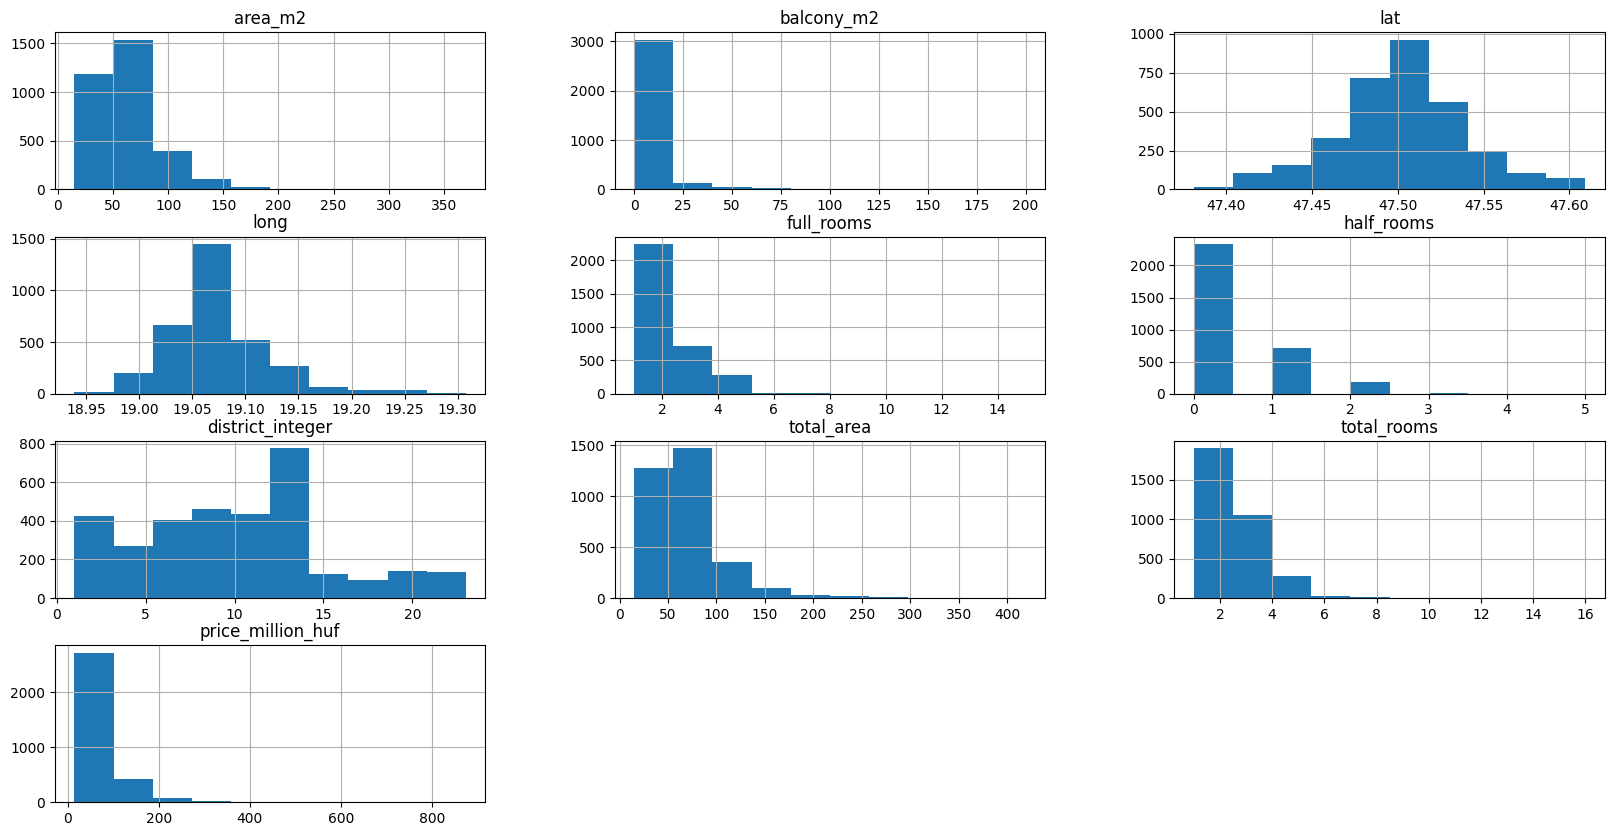

In [ ]:
train_data.hist(figsize=(20,10))

<ipython-input-101-d2c7e0218bd2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


<Axes: >

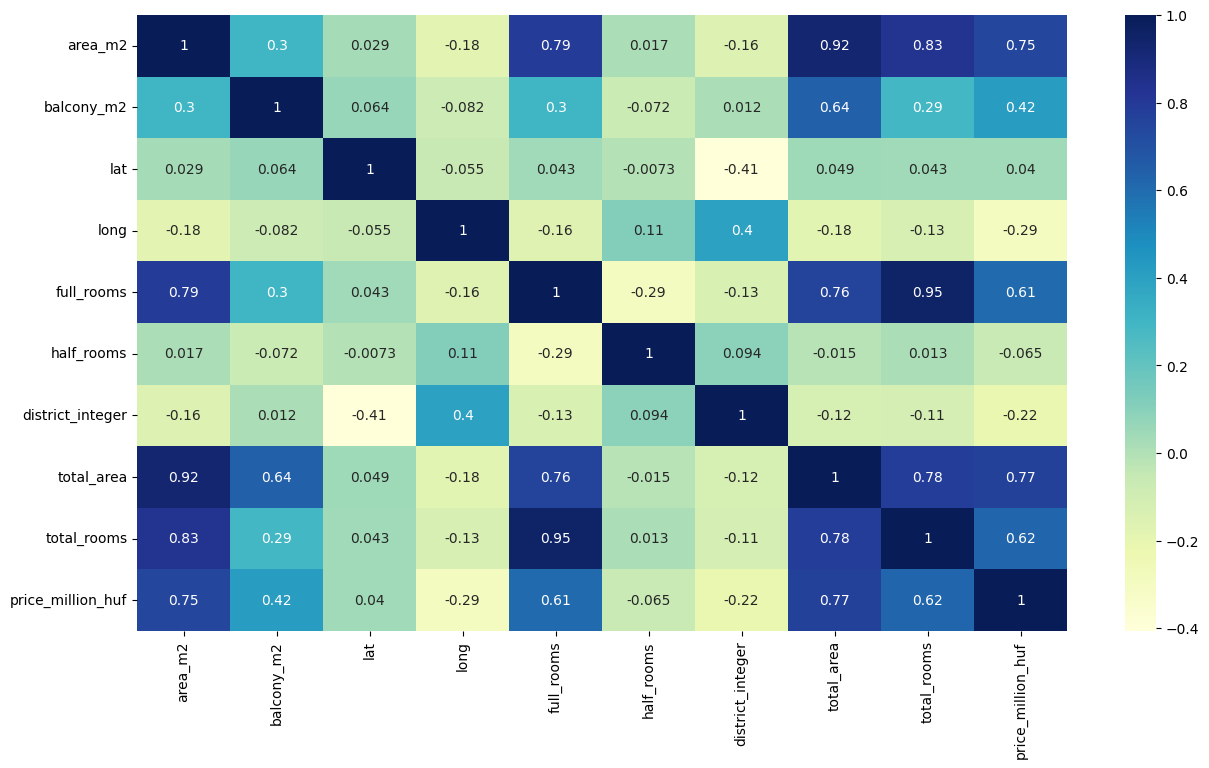

In [ ]:
correlation = train_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

# Step 17: Feature Engineering - Log Transformation

Applying log transformation to certain numerical features to improve linearity.

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_area'] = np.log(train_data['total_area'] + 1)
train_data['area_m2'] = np.log(train_data['area_m2'] + 1)
train_data['balcony_m2'] = np.log(train_data['balcony_m2'] + 1)

array([[<Axes: title={'center': 'area_m2'}>,
        <Axes: title={'center': 'balcony_m2'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'full_rooms'}>,
        <Axes: title={'center': 'half_rooms'}>],
       [<Axes: title={'center': 'district_integer'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'price_million_huf'}>, <Axes: >,
        <Axes: >]], dtype=object)

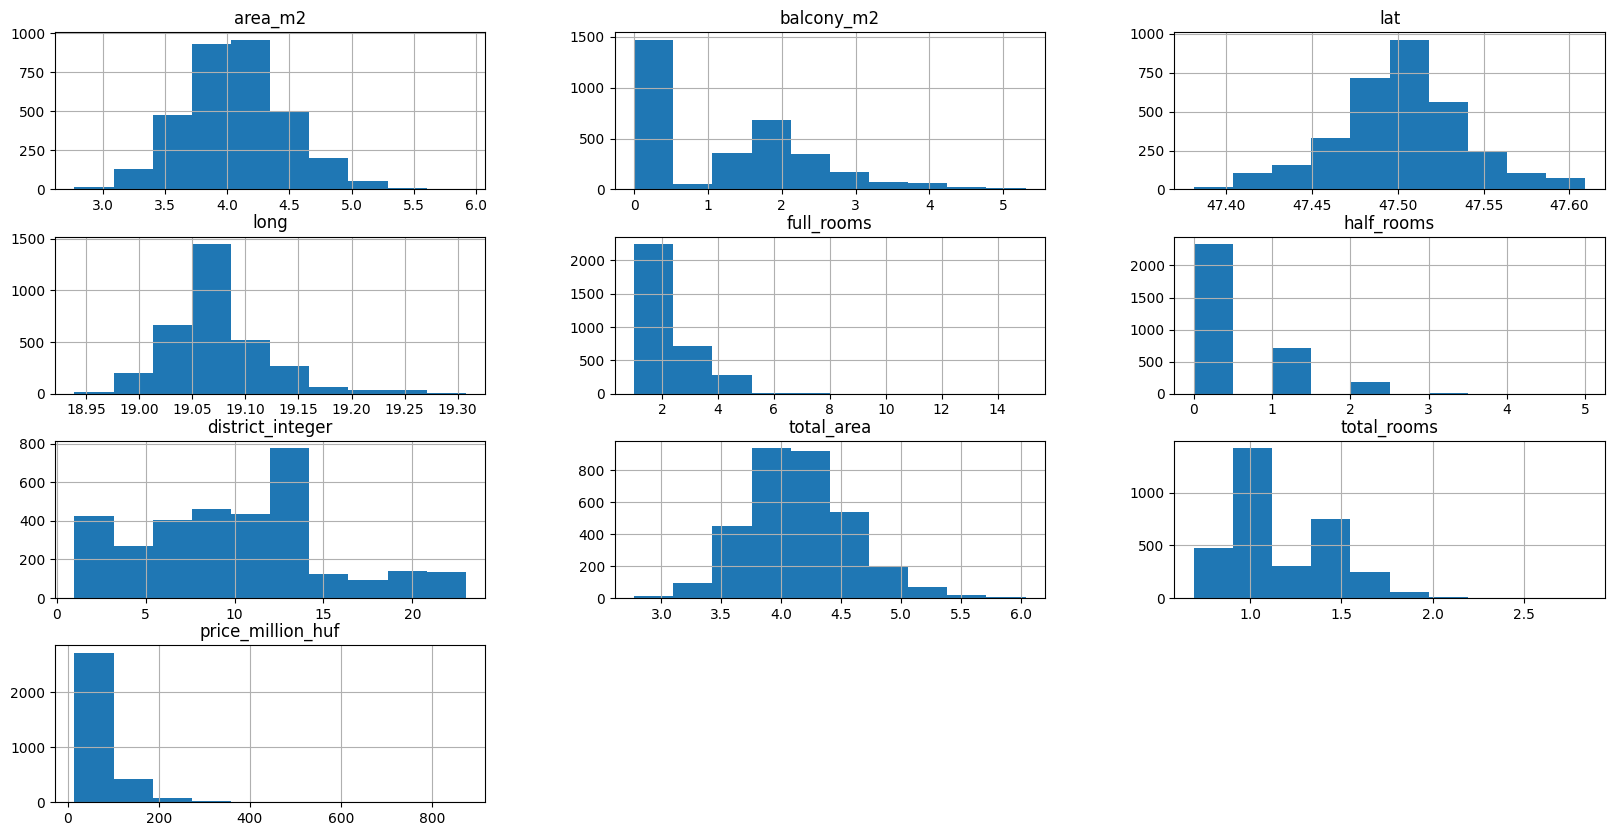

In [ ]:
train_data.hist(figsize=(20,10))

# Step 18: Feature Engineering - Dummy Variables

Creating dummy variables for categorical features like 'Near_River', 'balcony', and 'district_location'.
Dropping the original categorical columns after creating dummy variables.

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.Near_River)).drop(['Near_River'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.balcony)).drop(['balcony'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.district_location)).drop(['district_location'], axis=1)

<Axes: >

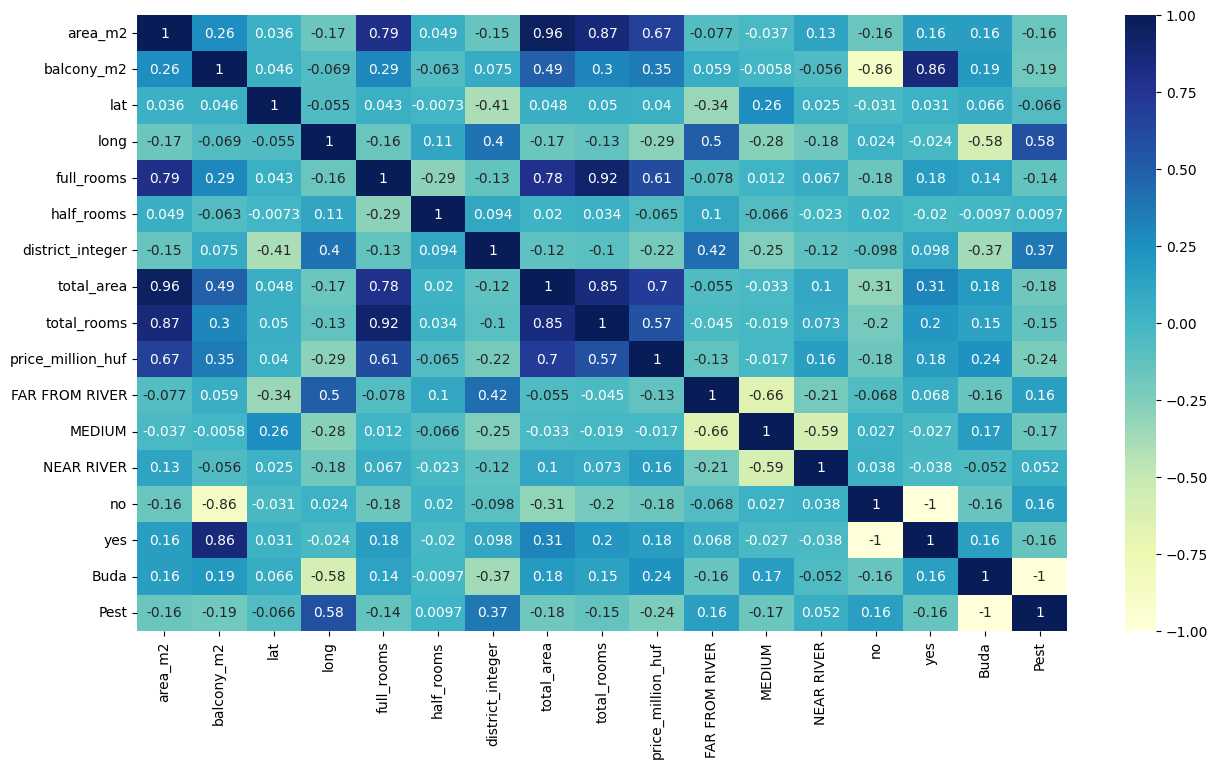

In [ ]:
correlation = train_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

<Axes: xlabel='lat', ylabel='long'>

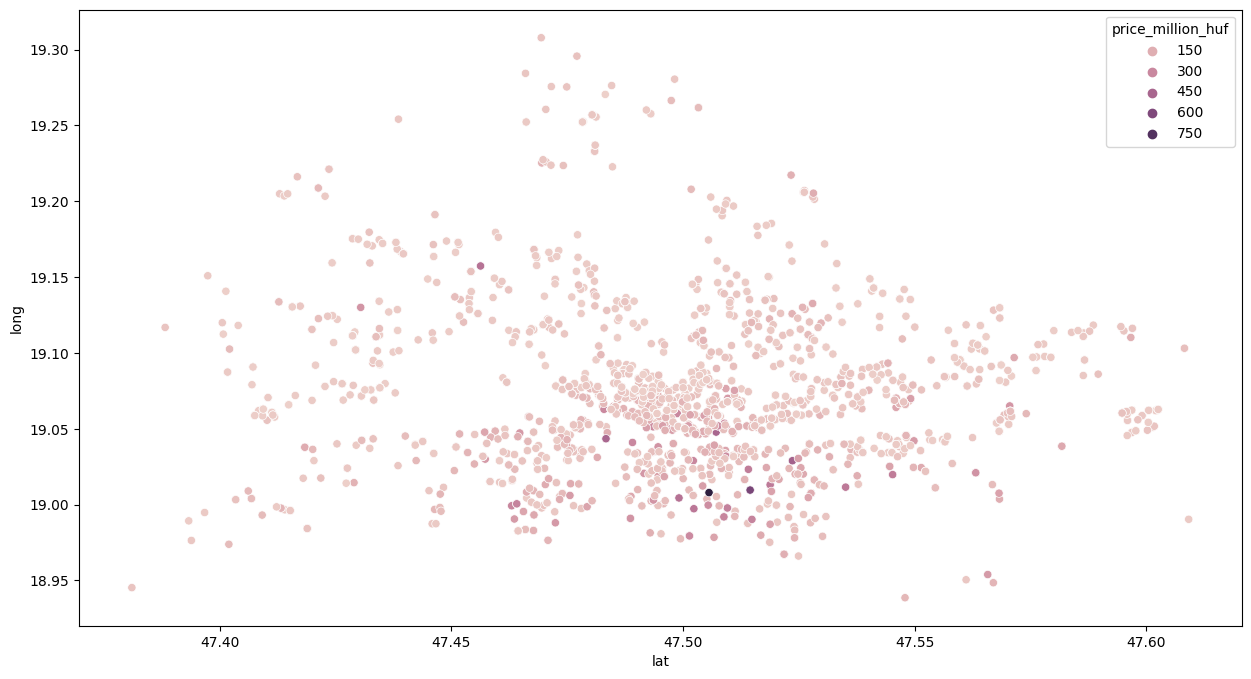

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="lat", y='long', data=train_data, hue='price_million_huf')

In [ ]:
df

,price_million_huf,area_m2,balcony_m2,lat,long,full_rooms,half_rooms,district_integer,district_location,balcony,total_area,total_rooms,Near_River
0,68.90,75,0.00,47.510050,19.125259,3,1,14,Pest,no,75.00,3.5,FAR FROM RIVER
1,68.99,56,4.00,47.457638,19.040389,2,0,11,Buda,yes,60.00,2.0,MEDIUM
2,60.20,44,4.18,47.594825,19.060386,2,0,3,Buda,yes,48.18,2.0,MEDIUM
3,48.50,51,0.00,47.568490,19.055889,2,0,3,Buda,no,51.00,2.0,MEDIUM
4,129.90,62,50.00,47.467827,18.993208,3,0,11,Buda,yes,112.00,3.0,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,48.00,43,2.00,47.498993,19.051517,2,0,4,Pest,yes,45.00,2.0,NEAR RIVER
4954,127.00,145,0.00,47.504577,19.058726,4,0,6,Pest,no,145.00,4.0,MEDIUM
4955,28.80,32,0.00,47.568276,19.048364,1,0,3,Buda,no,32.00,1.0,MEDIUM
4956,47.50,58,2.00,47.561363,19.078216,2,0,13,Pest,yes,60.00,2.0,NEAR RIVER


# Step 20: Model Training - Linear Regression

Initializing a linear regression model (reg).

Fitting the model to the training data.

In [ ]:
from sklearn.linear_model import LinearRegression


X_train, y_train = train_data.drop(['price_million_huf'], axis=1), train_data['price_million_huf']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

# Step 21: Model Evaluation - Linear Regression

Preparing the test data for evaluation.

Applying log transformation and creating dummy variables.

Evaluating the linear regression model on the test set.

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_area'] = np.log(test_data['total_area'] + 1)
test_data['area_m2'] = np.log(test_data['area_m2'] + 1)
test_data['balcony_m2'] = np.log(test_data['balcony_m2'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.Near_River)).drop(['Near_River'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.balcony)).drop(['balcony'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.district_location)).drop(['district_location'], axis=1)

In [ ]:
X_test, y_test = test_data.drop(['price_million_huf'], axis=1), test_data['price_million_huf']

In [ ]:
reg.score(X_test, y_test)

0.6567894123727246

# Step 22: Model Training - Linear Regression with Standardization

Standardizing the features using StandardScaler.

Fitting a linear regression model to the standardized training data.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


scaler = StandardScaler()

X_train, y_train = train_data.drop(['price_million_huf'], axis=1), train_data['price_million_huf']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

# Step 23: Model Evaluation - Linear Regression with Standardization

Transforming the test data using the same scaler.

Evaluating the linear regression model on the standardized test set.

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s, y_test)

0.6567894123727247

# Step 24: Model Training - Random Forest Regression

Initializing a random forest regressor (forest).

Fitting the random forest model to the standardized training data.
Evaluating the linear regression model on the standardized test set.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

forest.score(X_test_s, y_test)

0.7458775695081918

# Step 25: Model Evaluation - Random Forest Regression

Evaluating the random forest model on the standardized test set.

In [ ]:
forest.score(X_test_s, y_test)

0.7458775695081918

# Step 26: Hyperparameter Tuning - Grid Search for Random Forest

Performing grid search to find the best hyperparameters for the random forest model.

Extracting the best model from the grid search results.

Evaluating the best random forest model on the standardized test set.

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {"n_estimators": [3, 10, 30],
              "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

0.7651844264206102